컨볼루션 신경망은 영상처리에 주로 사용된다<br>
컨볼루션 신경망 모델의 주요 레이어 : <br>
1. 컨볼루션(convolution) 레이어
2. 맥스폴링(Max Pooling) 레이어
3. 플래튼(Flatten) 레이어

# 1. 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
<br>
케라스에서 제공하는 컨볼루션 레이어 종류에도 여러 가지 종류가 있으나 영상처리에 주로 사용되는 Conv2D 레이어를 쓴다.<br>
레이어는 영상 인식에 주로 사용하며 필터가 탑재되어 있다.<br>

    Conv2D(32, (5,5), padding='vaild', input_shape=(28,28,1), activation='relu')
    
1번째 인자 : 컨볼루션 필터의 수<br>
2번째 인자 : 컨볼루션 커널의 (행,열)<br>
3번째 인자 : padding : 경계 처리 방법을 정의한다.
 - vaild : 유효한 영역만 출력 -> 출력 이미지 사이즈는 입력 이미지 사이즈보다 작다.
 - same : 출력 이미지와 입력 이미지 사이즈가 동일하다.
 
4번째 인자 : input_shape : 샘플 수를 제외한 입력 형태를 정의한다. -> 모델에서 첫 레이어일 때만 정의하면 된다.
- (행, 열, 채널 수)로 정의한다. 흑백 영상 : 채널 1, 컬러(RGB)영상인 경우 : 채널 3 으로 설정

5번째 인자 : activation : 활성화 함수를 설정한다.
- linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나온다.
- relu : rectifier 함수, 주로 은닉층에 쓰인다.
- sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰인다.
- softmax : 소프트맥스 함수, 다중 클래스분류 문제에서 출력층에 주로 쓰인다.

입력 형태는 다음과 같다.<br>
image_data_format이 'channel_first'인 경우 (샘플 수, 채널 수, 행, 열) 로 이루어진 4D 텐서입니다.<br>
image_data_format이 'channel_last'인 경우 (샘플 수, 행, 열, 채널 수) 로 이루어진 4D 텐서입니다.<br>
image_data_format 옵션은 keras.json 파일 안에 있는 설정이다. 콘솔에서 vi ~/.keras/keras.json으로 파일 내용 변경 가능하다.<br>
<br>
출력 형태는 다음과 같다.<br>
image_data_format이 'channel_first'인 경우 (샘플 수, 필터 수, 행, 열) 로 이루어진 4D 텐서입니다.<br>
image_data_format이 'channel_last'인 경우 (샘플 수, 행, 열, 필터 수) 로 이루어진 4D 텐서입니다.<br>
행과 열의 크기는 padding이 same인 경우에는 입력 형태의 행과 열의 크기는 동일하다.<br>
<br>
입력 이미지 채널 수 : 1, 너비 : 3 픽셀, 크기:2x2인 필터가 하나인 경우를 레이어로 표시해보자.(단 image_data_format이 'channel_last'인 경우)<br>

    Conv2D(1, (2,2), padding='vaild', input_shape=(3,3,1))
    
도식화한 그림(P.113 참고)

#### 필터 : 가중치 의미 
-> 하나의 필터가 입력 이미지를 순회하면 적용된 결과값을 모으면 출력 이미지를 생성.
1. 하나의 필터로 입력 이미지를 순회하기 때문에 순회할 때 적용하는 가중치는 모두 동일 -> 파라미터 공유
2. 출력에 영향을 미치는 영역이 지역적으로 제한됨. -> p.113 그림 참고 -> 지역적인 특징을 잘 뽑아주면 영상 인식에 적합.(코는 코대로 눈은 눈대로)

#### 가중치의 수(p.114 참고)
: Dense 레이어( Dense(4, input_dim=9) )와 컨볼루션 레이어와 비교하면<br>
필터가 지역적으로만 적용되어 출력 뉴런에 영향을 미치는 입력 뉴런이 제한적이므로 Dense 레이어와 비교 했을 때, 가중치가 많이 줄어듬.

#### 경계처리 방법(p.115 참고)
vaild : 입력 이미지 영역에 맞게 필터를 적용하기 때문에 출력 이미지 크기가 입력 이미지 크기보다 작다.<br>
same : 출력 이미지와 입력 이미지가 동일하므로 입력 이미지 경계에 빈 영역을 추가하여 필터를 적용<br>
-> 입력 이미지에 경계를 학습시키는 효과가 있다.<br>
<br>
깊은 층을 가진 모델인 경우 vaild일 때 특징 맵이 계속 작아져서 정보가 많이 손실되므로 필터를 통과하더라도 원본 사이즈를 유지될 수 있도록 same을 설정

#### 필터 수(p. 116참고)
입력 이미지가 단 채널의 3x3이고, 2x2인 필터가 있다면 아래 코드로 컨볼루션 레이어를 정의할 수 있다.<br>

    Conv2D(1, (2,2), padding='same', input_shape=(3,3,1))
    
2x2 필터를 3개 사용했다면 아래 코드로 정의할 수 있다.<br>

    Conv2D(3, (2,2), padding='same', input_shape=(3,3,1))
    
필터가 3개라서 출력 이미지도 필터 수에 따라 3개로 늘어났다. 총 가중치 수는 3x2x2로 12개이다.<br>
필터마다 고유한 특징을 뽑아 고유한 출력 이미지로 만들기 때문에 필터의 출력값을 더해서 하나의 이미지로 만들지는 않는다.<br>
<br>
입력이미지가 여러 개인 경우

    Conv2D(1, (2,2), padding='same', input_shape=(3,3,3))
    
필터 개수가 3개 인 것처럼 보이지만 이는 입력 이미지에 따라 할당되는 커널이다.<br>
각 커널의 계산값이 결국 더해져서 출력 이미지 한 장을 만들어내므로 필터 개수는 1개이다.<br>
가중치는 2x2x3 = 12개이다.<br>
<br>
마지막으로 입력 이미지의 사이즈가 3x3이고 채널이 3개이며 사이즈가 2x2인 필터가 2개인 경우인 경우(p.118 참고)

     Conv2D(2, (2,2), padding='same', input_shape=(3,3,3))

# 2. 사소한 변화를 무시해주는 맥스풀링(Max pooling) 레이어
지역적인 사소한 변화를 영향을 미치지 않도록 한다.
    
    Maxpooling2D(pool_size(2,2))
    
1. 첫번째 인자 : pool_size : 수직, 수평 축소 비율을 지정 ex) (2,2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어든다.(p.119 참고)

이 레이어는 영상의 작은 변화라든지 사소한 움직임이 특징을 추출할 때 크게 영향을 미치지 않도록 한다.<br>
-> 사람마다 눈,코,입 위치가 조금씩 다른데 이러한 차이가 사람이라고 인식하는데 있어서는 큰 영향을 미치지 않는다.<br>

# 3. 영상을 일차원으로 바꿔주는 플래튼(Flatten) 레이어
컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해서는 1차원 자료로 바꿔줘야한다. -> 플래툰 레이어<br>
    
    Flatten()
    
이전 레이어의 출력 정보를 이용하여 입력 정보는 자동으로 설정되며, 출력 형태는 입력 형태에 따라 자동으로 계산되기 때문에 별도로 사용자가 파라미터를 지정해주지 않아도 된다.(p.120 참고)

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [9]:
model = Sequential()

model.add(Conv2D(2, (3,3), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(3, (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))

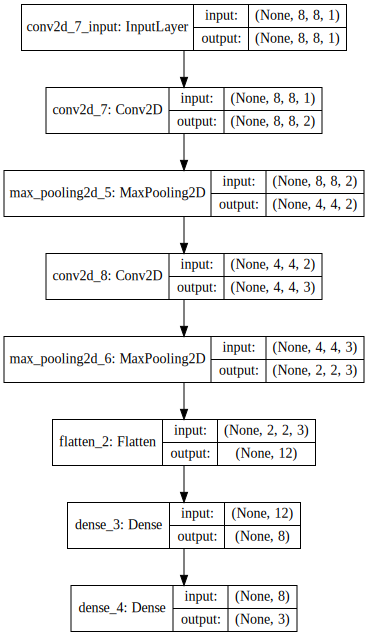

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 예제

### 1.문제 정의
컨볼루션 신경망 모델에 적합한 문제는 이미지 기반의 분류이다.<br>
삼각형, 사각형 원 이미지를 저장한 다음 이를 분류해보는 모델을 만들어보겠다.

- 문제 형태 : 다중 클래스 분류
- 입력 : 삼각형, 사각형, 원
- 출력 : 삼각형, 사각형, 원일 확률을 나타내는 확률

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

### 2. 데이터 준비하기 및 데이터셋 생성하기

케라스에서는 이미지 파일을 쉽게 학습시킬 수 있도록 ImageDataGenerator 클래스 제공<br>
ImageDataGenerator 클래스는 데이터 부풀리기(data augumentation)을 위해 막강한 기능을 제공<br>
먼저 ImageDataGenerator 클래스를 이용하여 객체를 생성한 뒤 flow_from_directory() 함수를 호출하여 generator를 생성한다. flow_from_directory() 주요 인자이다.
- 1번째 인자 : 이미지 경로를 지정
- 2번째 인자 : target_size : 패치 이미지 크기를 지정한다. 폴더에 있는 원본 이미지 크기가 다르더라도 target_size에 지정된 크기로 자동 조절.
- 3번째 인자 : batch_size : 배치 크기를 지정
- 4번째 인자 : class mode : 분류 방식에 대하여 지정
    1. categorical : 2D one-hot 부호화된 라벨이 반환
    2. binary : 1D 이진 라벨이 반환
    3. sparse : 1D 정수 라벨이 반환
    4. None : 라벨이 반환되지 않는다.
    
여기서 generator는 훈련용과 검증용으로 두 개 만들었다.

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./handwriting_shape/train', target_size=(24,24), batch_size=3, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./handwriting_shape/test', target_size=(24,24), batch_size=3, class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 3. 모델 구성하기
영상 분류에 높은 성능을 보이고 있는 컨볼루션 신경망 모델을 구성해보겠다.<br>
- 컨볼루션 레이어 : 입력 이미지 크기 24x24, 입력 이미지 채널 3개, 필터 크기 3x3, 필터 수 32, 활성화 함수 relu
- 컨볼루션 레이어 : 필터 크기 3x3, 필터 수 64, 활성화 함수 relu
- 맥스폴링 레이어 : 풀 크기 2x2
- 플래튼 레이어 
- 댄스 레이어 : 출력 뉴런 수 128개, 활성화 함수 relu
- 댄스 레이어 : 출력 뉴런 수 3개, 활성화 함수 softmax

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

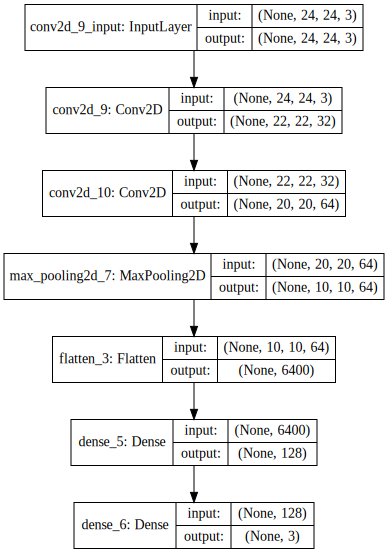

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 4. 모델 학습과정 설정하기
모델을 정의하였다면 모델을 손실함수와 최적화 알고리즘으로 엮어본다.<br>
- loss : 현재 가중치 세트를 평가하는데 사용한 손실함수. 다중 클래스 문제이므로 'categorical_crossentropy'으로 지정
- optimizer : 최적의 가중치를 검색하는데 사용하는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 하나인 adam을 사용
- metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 accuracy으로 지정

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 부풀리기
케라스에서는 주로 fit() 함수로 모델 학습시킬 때 사용하지만 generator로 생성된 배치로 학습시킬 경우에는 fit_generator()함수를 사용<br>
-> ImageDataGenerator()라는 generator로 이미지를 담고 있는 배치로 학습시켰기 때문<br>
<br>
- 1번째 인자 : 훈련 데이터셋을 제공할 generator를 지정
- 2번째 인자 : steps_per_epoch : 한 epoch에사용한 스텝 수 지정 -> 45개 훈련 샘플이 있고 배치 사이즈가 3개이므로 15로 설정
- 3번째 인자 : epoch : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정
- 4번째 인자 : validation_data : 검증 데이터셋에 대해 제공할 generator를 지정.
- 5번째 인자 : validation_steps : 한 epoch 종료 시마다 검증할 때 사용되는 검증 스텝 수를 지정 -> 총 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 설정

In [22]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=100,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/100
15/15 [==============================] - 0s 32ms/step - loss: 1.0577 - acc: 0.6889 - val_loss: 0.5457 - val_acc: 0.9333
Epoch 2/100
15/15 [==============================] - 1s 38ms/step - loss: 0.1759 - acc: 1.0000 - val_loss: 0.0577 - val_acc: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 28ms/step - loss: 0.0172 - acc: 1.0000 - val_loss: 0.0716 - val_acc: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 24ms/step - loss: 2.2179e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 6/100
15/15 [==============================] - 1s 43ms/step - loss: 1.7319e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 7/100
15/15 [==============================] - 1s 45ms/step - loss: 1.4928e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 8/100
15/15 [==============================] - 1s 37ms/ste

Epoch 61/100
15/15 [==============================] - ETA: 0s - loss: 5.3049e-06 - acc: 1.000 - 1s 43ms/step - loss: 5.1539e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 62/100
15/15 [==============================] - 1s 44ms/step - loss: 4.9671e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 63/100
15/15 [==============================] - 1s 44ms/step - loss: 4.8002e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 64/100
15/15 [==============================] - 1s 52ms/step - loss: 4.6121e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 65/100
15/15 [==============================] - 1s 38ms/step - loss: 4.4267e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 66/100
15/15 [==============================] - 1s 43ms/step - loss: 4.2664e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 67/100
15/15 [==============================] - 1s 43ms/step - loss: 4.1194e-06 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

### 7. 모델 평가하기
학습한 모델을 평가할 때 generator에서 제공되는 샘플로 평가할 때는 evaluate_generator 함수를 사용한다.

In [24]:
print "-- Evaluate --"
scores = model.evaluate_generator(test_generator,  steps=5)
print "%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)

-- Evaluate --
acc: 100.00%


### 8. 모델 사용하기
모델 사용 시에 generator에서 제공되는 샘플을 입력할 때는 predict_generator 함수를 사용한다.<br>
예측 결과는 클래스별 확률 벡터로 출력된다.<br>
generator의 'class_indices'를 출력하면 해당 열의 클래스명을 알 수 있다.

In [25]:
print "-- Predict --"
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float' : lambda x: "{0:0.3f}".format(x)})
print test_generator.class_indices
print output

-- Predict --
{'circle': 0, 'triangle': 2, 'rectangle': 1}
[[0.000 1.000 0.000]
 [0.004 0.989 0.008]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.999 0.000 0.001]
 [0.000 0.000 1.000]
 [0.000 0.006 0.994]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]
